<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Garage3" data-toc-modified-id="Garage3-1">Garage3</a></span><ul class="toc-item"><li><span><a href="#Standard-ICP" data-toc-modified-id="Standard-ICP-1.1">Standard ICP</a></span></li><li><span><a href="#With-Segmentation" data-toc-modified-id="With-Segmentation-1.2">With Segmentation</a></span></li><li><span><a href="#Segmentation-from-NYU" data-toc-modified-id="Segmentation-from-NYU-1.3">Segmentation from NYU</a></span></li></ul></li><li><span><a href="#Rumlang-1" data-toc-modified-id="Rumlang-1-2">Rumlang 1</a></span><ul class="toc-item"><li><span><a href="#Standard-ICP" data-toc-modified-id="Standard-ICP-2.1">Standard ICP</a></span></li><li><span><a href="#Segmentation-from-NYU" data-toc-modified-id="Segmentation-from-NYU-2.2">Segmentation from NYU</a></span></li></ul></li><li><span><a href="#Rumlang-2" data-toc-modified-id="Rumlang-2-3">Rumlang 2</a></span><ul class="toc-item"><li><span><a href="#Standard-ICP" data-toc-modified-id="Standard-ICP-3.1">Standard ICP</a></span></li><li><span><a href="#Segmentation-from-NYU" data-toc-modified-id="Segmentation-from-NYU-3.2">Segmentation from NYU</a></span></li></ul></li><li><span><a href="#Rumlang-3" data-toc-modified-id="Rumlang-3-4">Rumlang 3</a></span><ul class="toc-item"><li><span><a href="#Standard-ICP" data-toc-modified-id="Standard-ICP-4.1">Standard ICP</a></span></li></ul></li></ul></div>

In [2]:
import pandas as pd
import numpy as np
import scipy as sp
import scipy.interpolate
import scipy.spatial.transform as stf
import re
import matplotlib.pyplot as plt
%matplotlib inline

# NYU to CLA to Rumlang
## Replay
### Garage 3

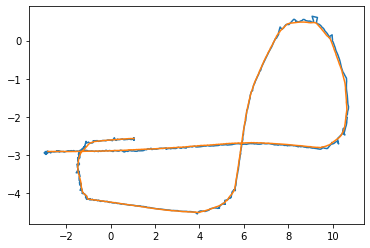

Mean: 0.041, Median: 0.033, Std: 0.030


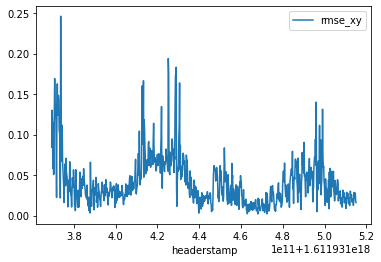

In [11]:
icp = pd.read_csv('~/asl/rss_2021_data/crossdomain_nyutoclatorumlang_garage3_icp_1.csv')
leica = pd.read_csv('~/asl/rss_2021_data/crossdomain_nyutoclatorumlang_garage3_leica_1.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y']
leica['aligned_y'] = leica['trans_x']
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 4.5e8, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 4.5e8, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}, Std: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median(), icp['rmse_xy'].std()))

### Rumlang 1

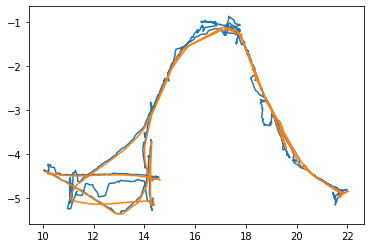

Mean: 0.098, Median: 0.066, Std: 0.098


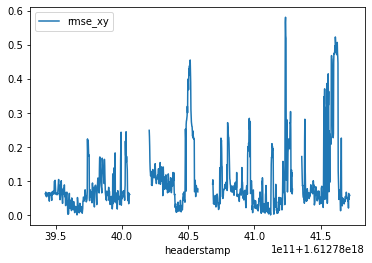

In [12]:
icp = pd.read_csv('~/asl/rss_2021_data/crossdomain_nyutoclatorumlang_rumlang1_icp_1.csv')
leica = pd.read_csv('~/asl/rss_2021_data/crossdomain_nyutoclatorumlang_rumlang1_leica_1.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y'] + 17.3084
leica['aligned_y'] = leica['trans_x'] - 6.20957
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
# fill gaps with nan
deltas = leica['headerstamp'].diff()
for gap_idx in deltas[deltas > 1e9].index:
    icp['rmse_xy'][np.logical_and(icp['headerstamp'] > leica['headerstamp'][gap_idx -1 ], icp['headerstamp'] < leica['headerstamp'][gap_idx])] = np.nan
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}, Std: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median(), icp['rmse_xy'].std()))

## Finetune
### Garage 3

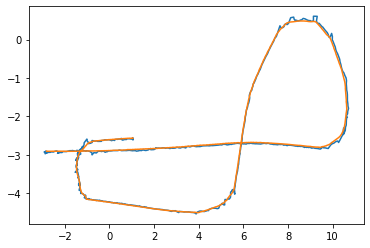

Mean: 0.040, Median: 0.033, Std: 0.029


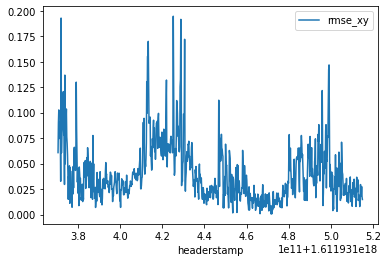

In [13]:
icp = pd.read_csv('~/asl/rss_2021_data/crossdomain_nyutoclafinetunetorumlangfinetune_garage3_icp_1.csv')
leica = pd.read_csv('~/asl/rss_2021_data/crossdomain_nyutoclafinetunetorumlangfinetune_garage3_leica_1.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y']
leica['aligned_y'] = leica['trans_x']
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 4.5e8, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 4.5e8, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}, Std: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median(), icp['rmse_xy'].std()))

### Rumlang 1

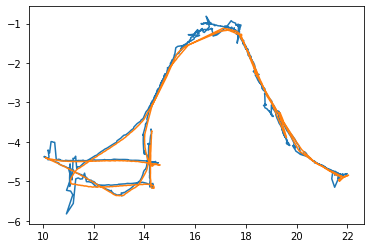

Mean: 0.087, Median: 0.067, Std: 0.077


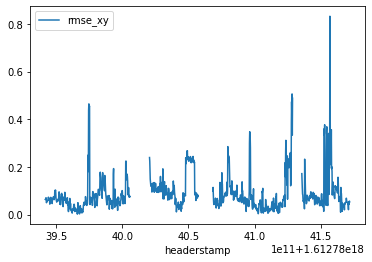

In [14]:
icp = pd.read_csv('~/asl/rss_2021_data/crossdomain_nyutoclafinetunetorumlangfinetune_rumlang1_icp_1.csv')
leica = pd.read_csv('~/asl/rss_2021_data/crossdomain_nyutoclafinetunetorumlangfinetune_rumlang1_leica_1.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y'] + 17.3084
leica['aligned_y'] = leica['trans_x'] - 6.20957
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
# fill gaps with nan
deltas = leica['headerstamp'].diff()
for gap_idx in deltas[deltas > 1e9].index:
    icp['rmse_xy'][np.logical_and(icp['headerstamp'] > leica['headerstamp'][gap_idx -1 ], icp['headerstamp'] < leica['headerstamp'][gap_idx])] = np.nan
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}, Std: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median(), icp['rmse_xy'].std()))

# NYU to Office to Rumlang
## Replay
### Office7

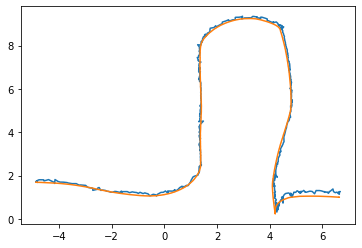

Mean: 0.147, Median: 0.137, Std: 0.081


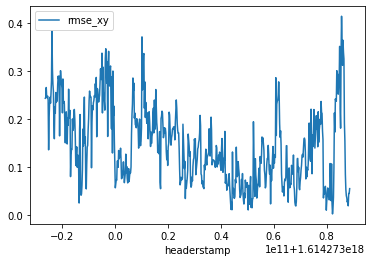

In [10]:
icp = pd.read_csv('~/asl/rss_2021_data/crossdomain_nyutoofficereplaytorumlangreplay_office7_icp_1.csv')
leica = pd.read_csv('~/asl/rss_2021_data/crossdomain_nyutoofficereplaytorumlangreplay_office7_leica_1.csv')
# alignment of reference frames
rot = 0.09 * np.pi
leica['aligned_x'] = -leica['trans_x']
leica['aligned_y'] = -leica['trans_y']
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 4e8, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 4e8, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}, Std: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median(), icp['rmse_xy'].std()))

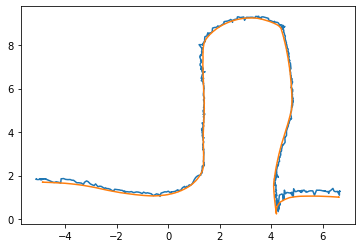

Mean: 0.171, Median: 0.161, Std: 0.086


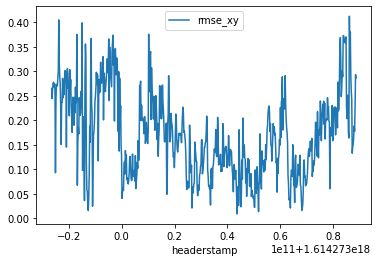

In [32]:
# 6DOF
icp = pd.read_csv('~/asl/rss_2021_data/crossdomain_nyutoofficereplaytorumlangreplay_office7_icp_3.csv')
leica = pd.read_csv('~/asl/rss_2021_data/crossdomain_nyutoofficereplaytorumlangreplay_office7_leica_3.csv')
# alignment of reference frames
rot = 0.09 * np.pi
leica['aligned_x'] = -leica['trans_x']
leica['aligned_y'] = -leica['trans_y']
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 4e8, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 4e8, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}, Std: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median(), icp['rmse_xy'].std()))

### Rumlang 1

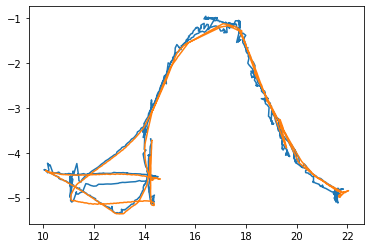

Mean: 0.110, Median: 0.073, Std: 0.095


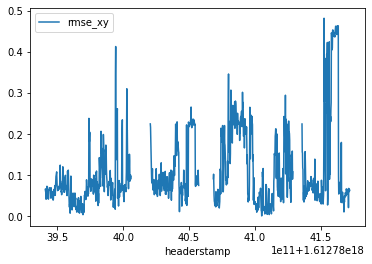

In [7]:
icp = pd.read_csv('~/asl/rss_2021_data/crossdomain_nyutoofficereplaytorumlangreplay_rumlang1_icp_1.csv')
leica = pd.read_csv('~/asl/rss_2021_data/crossdomain_nyutoofficereplaytorumlangreplay_rumlang1_leica_1.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y'] + 17.3084
leica['aligned_y'] = leica['trans_x'] - 6.20957
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
# fill gaps with nan
deltas = leica['headerstamp'].diff()
for gap_idx in deltas[deltas > 1e9].index:
    icp['rmse_xy'][np.logical_and(icp['headerstamp'] > leica['headerstamp'][gap_idx -1 ], icp['headerstamp'] < leica['headerstamp'][gap_idx])] = np.nan
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}, Std: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median(), icp['rmse_xy'].std()))

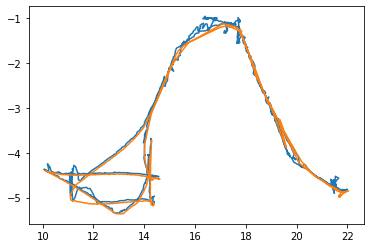

Mean: 0.091, Median: 0.066, Std: 0.085


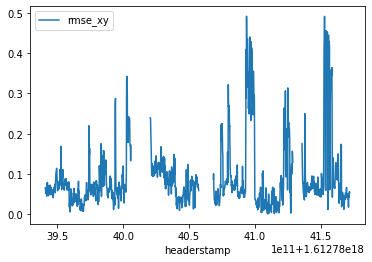

In [29]:
# without 4dof
icp = pd.read_csv('~/asl/rss_2021_data/crossdomain_nyutoofficereplaytorumlangreplay_rumlang1_icp_3.csv')
leica = pd.read_csv('~/asl/rss_2021_data/crossdomain_nyutoofficereplaytorumlangreplay_rumlang1_leica_3.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y'] + 17.3084
leica['aligned_y'] = leica['trans_x'] - 6.20957
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
# fill gaps with nan
deltas = leica['headerstamp'].diff()
for gap_idx in deltas[deltas > 1e9].index:
    icp['rmse_xy'][np.logical_and(icp['headerstamp'] > leica['headerstamp'][gap_idx -1 ], icp['headerstamp'] < leica['headerstamp'][gap_idx])] = np.nan
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}, Std: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median(), icp['rmse_xy'].std()))

## Finetinung
### Office 7

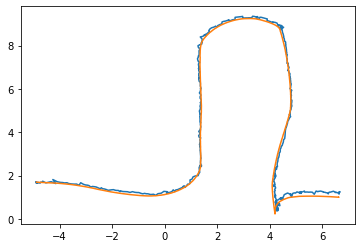

Mean: 0.152, Median: 0.149, Std: 0.074


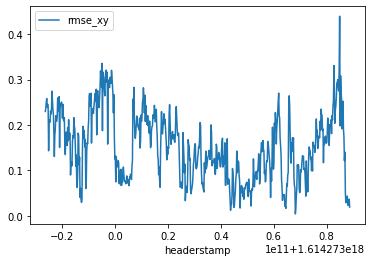

In [9]:
icp = pd.read_csv('~/asl/rss_2021_data/crossdomain_nyutoofficefinetunetorumlangfinetune_office7_icp_1.csv')
leica = pd.read_csv('~/asl/rss_2021_data/crossdomain_nyutoofficefinetunetorumlangfinetune_office7_leica_1.csv')
# alignment of reference frames
rot = 0.09 * np.pi
leica['aligned_x'] = -leica['trans_x']
leica['aligned_y'] = -leica['trans_y']
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 4e8, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 4e8, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}, Std: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median(), icp['rmse_xy'].std()))

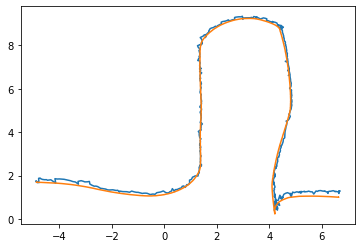

Mean: 0.168, Median: 0.159, Std: 0.088


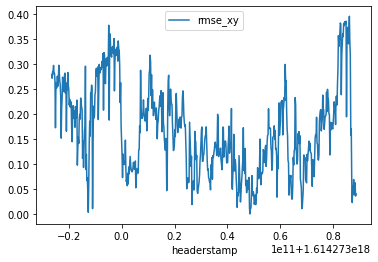

In [33]:
# 6 DOF
icp = pd.read_csv('~/asl/rss_2021_data/crossdomain_nyutoofficefinetunetorumlangfinetune_office7_icp_2.csv')
leica = pd.read_csv('~/asl/rss_2021_data/crossdomain_nyutoofficefinetunetorumlangfinetune_office7_leica_2.csv')
# alignment of reference frames
rot = 0.09 * np.pi
leica['aligned_x'] = -leica['trans_x']
leica['aligned_y'] = -leica['trans_y']
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 4e8, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 4e8, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}, Std: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median(), icp['rmse_xy'].std()))

## Rumlang 1

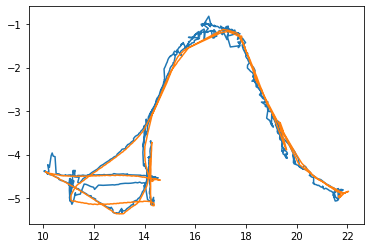

Mean: 0.122, Median: 0.075, Std: 0.115


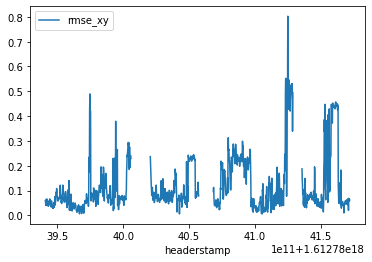

In [8]:
icp = pd.read_csv('~/asl/rss_2021_data/crossdomain_nyutoofficefinetunetorumlangfinetune_rumlang1_icp_2.csv')
leica = pd.read_csv('~/asl/rss_2021_data/crossdomain_nyutoofficefinetunetorumlangfinetune_rumlang1_leica_2.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y'] + 17.3084
leica['aligned_y'] = leica['trans_x'] - 6.20957
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
# fill gaps with nan
deltas = leica['headerstamp'].diff()
for gap_idx in deltas[deltas > 1e9].index:
    icp['rmse_xy'][np.logical_and(icp['headerstamp'] > leica['headerstamp'][gap_idx -1 ], icp['headerstamp'] < leica['headerstamp'][gap_idx])] = np.nan
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}, Std: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median(), icp['rmse_xy'].std()))

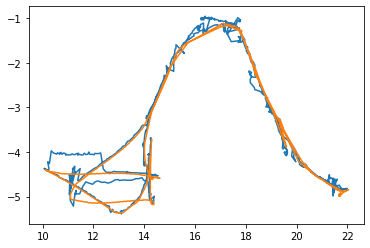

Mean: 0.121, Median: 0.070, Std: 0.128


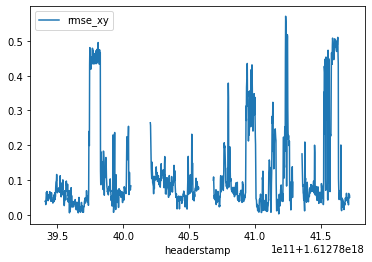

In [30]:
# full 6DOF for sure
icp = pd.read_csv('~/asl/rss_2021_data/crossdomain_nyutoofficefinetunetorumlangfinetune_rumlang1_icp_4.csv')
leica = pd.read_csv('~/asl/rss_2021_data/crossdomain_nyutoofficefinetunetorumlangfinetune_rumlang1_leica_4.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y'] + 17.3084
leica['aligned_y'] = leica['trans_x'] - 6.20957
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
# fill gaps with nan
deltas = leica['headerstamp'].diff()
for gap_idx in deltas[deltas > 1e9].index:
    icp['rmse_xy'][np.logical_and(icp['headerstamp'] > leica['headerstamp'][gap_idx -1 ], icp['headerstamp'] < leica['headerstamp'][gap_idx])] = np.nan
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}, Std: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median(), icp['rmse_xy'].std()))

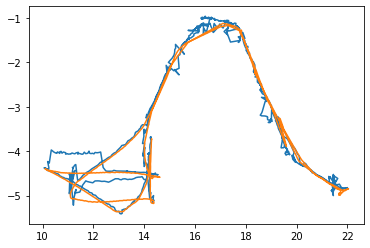

Mean: 0.136, Median: 0.073, Std: 0.140


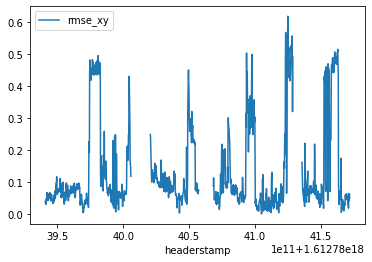

In [34]:
# full 6DOF for sure
# redo because the run above looks so weird
icp = pd.read_csv('~/asl/rss_2021_data/crossdomain_nyutoofficefinetunetorumlangfinetune_rumlang1_icp_5.csv')
leica = pd.read_csv('~/asl/rss_2021_data/crossdomain_nyutoofficefinetunetorumlangfinetune_rumlang1_leica_5.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y'] + 17.3084
leica['aligned_y'] = leica['trans_x'] - 6.20957
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
# fill gaps with nan
deltas = leica['headerstamp'].diff()
for gap_idx in deltas[deltas > 1e9].index:
    icp['rmse_xy'][np.logical_and(icp['headerstamp'] > leica['headerstamp'][gap_idx -1 ], icp['headerstamp'] < leica['headerstamp'][gap_idx])] = np.nan
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}, Std: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median(), icp['rmse_xy'].std()))

# NYU to Rumlang to Office
## Replay
### Rumlang 1

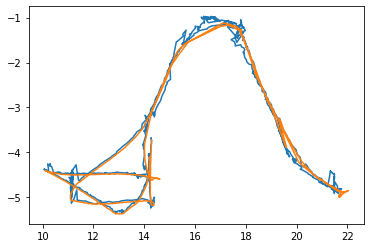

Mean: 0.125, Median: 0.072, Std: 0.128


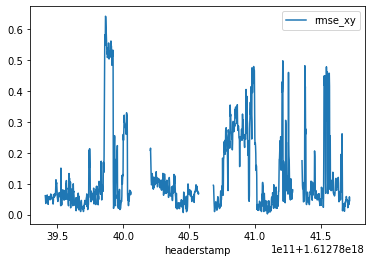

In [26]:
# without 4DOF
icp = pd.read_csv('~/asl/rss_2021_data/crossdomain_nyutorumlangreplaytoofficereplay_rumlang1_icp_1.csv')
leica = pd.read_csv('~/asl/rss_2021_data/crossdomain_nyutorumlangreplaytoofficereplay_rumlang1_leica_1.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y'] + 17.3084
leica['aligned_y'] = leica['trans_x'] - 6.20957
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
# fill gaps with nan
deltas = leica['headerstamp'].diff()
for gap_idx in deltas[deltas > 1e9].index:
    icp['rmse_xy'][np.logical_and(icp['headerstamp'] > leica['headerstamp'][gap_idx -1 ], icp['headerstamp'] < leica['headerstamp'][gap_idx])] = np.nan
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}, Std: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median(), icp['rmse_xy'].std()))

### Office 7

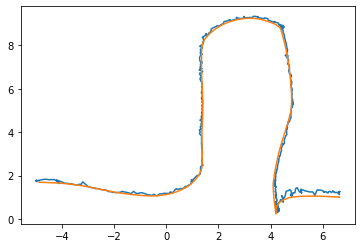

Mean: 0.145, Median: 0.128, Std: 0.084


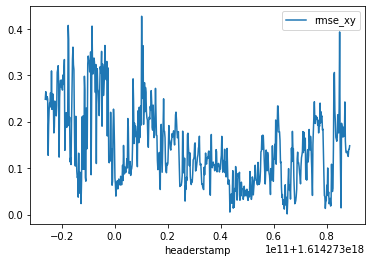

In [20]:
icp = pd.read_csv('~/asl/rss_2021_data/crossdomain_nyutorumlangreplaytoofficereplay_office7_icp_1.csv')
leica = pd.read_csv('~/asl/rss_2021_data/crossdomain_nyutorumlangreplaytoofficereplay_office7_leica_1.csv')
# alignment of reference frames
rot = 0.09 * np.pi
leica['aligned_x'] = -leica['trans_x']
leica['aligned_y'] = -leica['trans_y']
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 4e8, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 4e8, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}, Std: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median(), icp['rmse_xy'].std()))

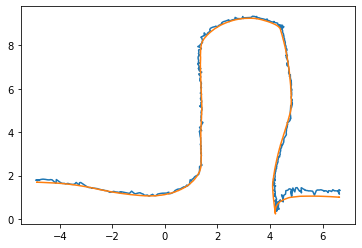

Mean: 0.158, Median: 0.137, Std: 0.093


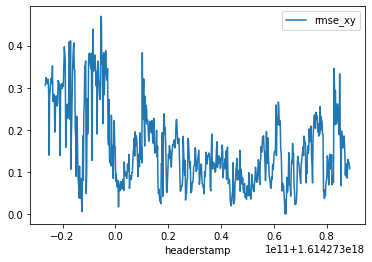

In [23]:
# without 4DOF
icp = pd.read_csv('~/asl/rss_2021_data/crossdomain_nyutorumlangreplaytoofficereplay_office7_icp_2.csv')
leica = pd.read_csv('~/asl/rss_2021_data/crossdomain_nyutorumlangreplaytoofficereplay_office7_leica_2.csv')
# alignment of reference frames
rot = 0.09 * np.pi
leica['aligned_x'] = -leica['trans_x']
leica['aligned_y'] = -leica['trans_y']
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 4e8, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 4e8, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}, Std: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median(), icp['rmse_xy'].std()))

## Finetune
### Rumlang 1

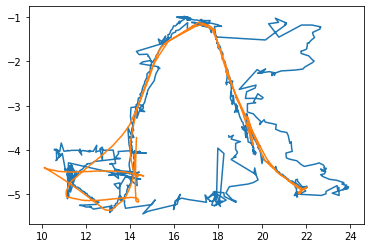

Mean: 0.801, Median: 0.241, Std: 1.230


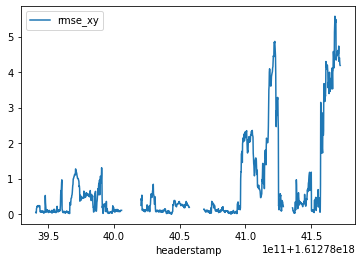

In [27]:
# without 4DOF
icp = pd.read_csv('~/asl/rss_2021_data/crossdomain_nyutorumlangfinetunetoofficefinetune_rumlang1_icp_1.csv')
leica = pd.read_csv('~/asl/rss_2021_data/crossdomain_nyutorumlangfinetunetoofficefinetune_rumlang1_leica_1.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y'] + 17.3084
leica['aligned_y'] = leica['trans_x'] - 6.20957
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
# fill gaps with nan
deltas = leica['headerstamp'].diff()
for gap_idx in deltas[deltas > 1e9].index:
    icp['rmse_xy'][np.logical_and(icp['headerstamp'] > leica['headerstamp'][gap_idx -1 ], icp['headerstamp'] < leica['headerstamp'][gap_idx])] = np.nan
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}, Std: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median(), icp['rmse_xy'].std()))

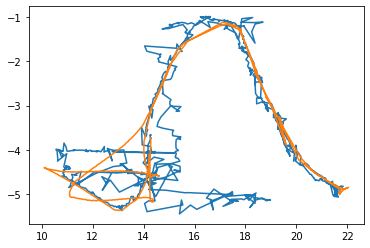

Mean: 0.514, Median: 0.191, Std: 0.914


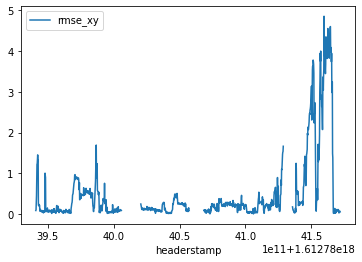

In [28]:
# without 4DOF
# redid the above because so bad results
icp = pd.read_csv('~/asl/rss_2021_data/crossdomain_nyutorumlangfinetunetoofficefinetune_rumlang1_icp_2.csv')
leica = pd.read_csv('~/asl/rss_2021_data/crossdomain_nyutorumlangfinetunetoofficefinetune_rumlang1_leica_2.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y'] + 17.3084
leica['aligned_y'] = leica['trans_x'] - 6.20957
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
# fill gaps with nan
deltas = leica['headerstamp'].diff()
for gap_idx in deltas[deltas > 1e9].index:
    icp['rmse_xy'][np.logical_and(icp['headerstamp'] > leica['headerstamp'][gap_idx -1 ], icp['headerstamp'] < leica['headerstamp'][gap_idx])] = np.nan
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}, Std: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median(), icp['rmse_xy'].std()))

### Office 7

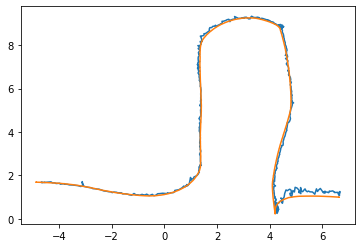

Mean: 0.132, Median: 0.116, Std: 0.079


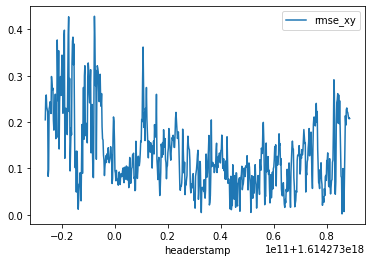

In [21]:
icp = pd.read_csv('~/asl/rss_2021_data/crossdomain_nyutorumlangfinetunetoofficefinetune_office7_icp_1.csv')
leica = pd.read_csv('~/asl/rss_2021_data/crossdomain_nyutorumlangfinetunetoofficefinetune_office7_leica_1.csv')
# alignment of reference frames
rot = 0.09 * np.pi
leica['aligned_x'] = -leica['trans_x']
leica['aligned_y'] = -leica['trans_y']
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 4e8, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 4e8, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}, Std: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median(), icp['rmse_xy'].std()))

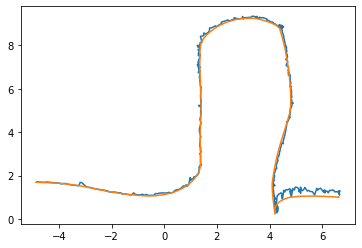

Mean: 0.146, Median: 0.123, Std: 0.093


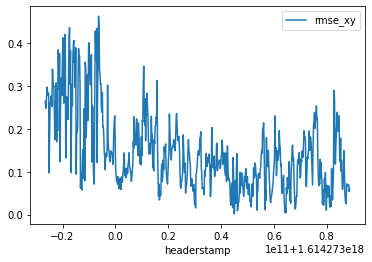

In [25]:
# without 4DOF
icp = pd.read_csv('~/asl/rss_2021_data/crossdomain_nyutorumlangfinetunetoofficefinetune_office7_icp_2.csv')
leica = pd.read_csv('~/asl/rss_2021_data/crossdomain_nyutorumlangfinetunetoofficefinetune_office7_leica_2.csv')
# alignment of reference frames
rot = 0.09 * np.pi
leica['aligned_x'] = -leica['trans_x']
leica['aligned_y'] = -leica['trans_y']
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 4e8, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 4e8, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}, Std: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median(), icp['rmse_xy'].std()))

# NYU to Rumlang to CLA
## Replay
### Rumlang 1

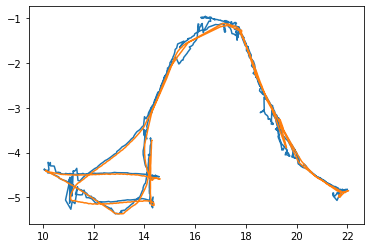

Mean: 0.091, Median: 0.072, Std: 0.070


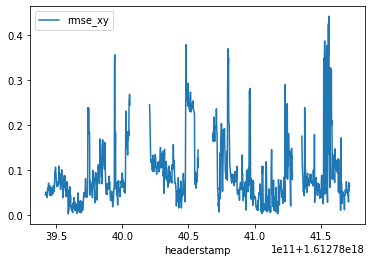

In [15]:
icp = pd.read_csv('~/asl/rss_2021_data/crossdomain_nyutorumlangreplaytoclareplay_rumlang1_icp_2.csv')
leica = pd.read_csv('~/asl/rss_2021_data/crossdomain_nyutorumlangreplaytoclareplay_rumlang1_leica_2.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y'] + 17.3084
leica['aligned_y'] = leica['trans_x'] - 6.20957
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
# fill gaps with nan
deltas = leica['headerstamp'].diff()
for gap_idx in deltas[deltas > 1e9].index:
    icp['rmse_xy'][np.logical_and(icp['headerstamp'] > leica['headerstamp'][gap_idx -1 ], icp['headerstamp'] < leica['headerstamp'][gap_idx])] = np.nan
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}, Std: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median(), icp['rmse_xy'].std()))

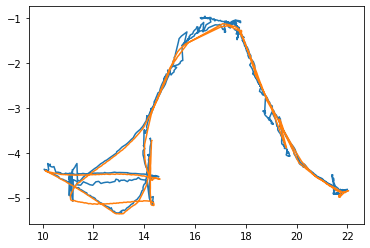

Mean: 0.105, Median: 0.068, Std: 0.108


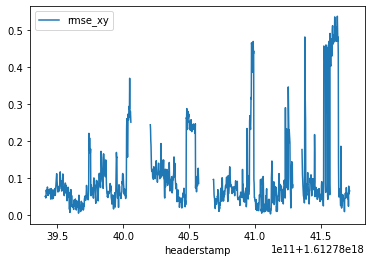

In [35]:
# making sure this is 6DOF
icp = pd.read_csv('~/asl/rss_2021_data/crossdomain_nyutorumlangreplaytoclareplay_rumlang1_icp_4.csv')
leica = pd.read_csv('~/asl/rss_2021_data/crossdomain_nyutorumlangreplaytoclareplay_rumlang1_leica_4.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y'] + 17.3084
leica['aligned_y'] = leica['trans_x'] - 6.20957
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
# fill gaps with nan
deltas = leica['headerstamp'].diff()
for gap_idx in deltas[deltas > 1e9].index:
    icp['rmse_xy'][np.logical_and(icp['headerstamp'] > leica['headerstamp'][gap_idx -1 ], icp['headerstamp'] < leica['headerstamp'][gap_idx])] = np.nan
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}, Std: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median(), icp['rmse_xy'].std()))

### Garage 3

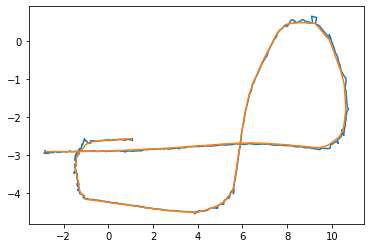

Mean: 0.040, Median: 0.033, Std: 0.029


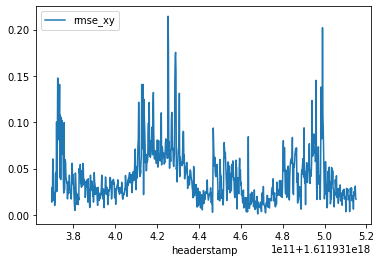

In [16]:
icp = pd.read_csv('~/asl/rss_2021_data/crossdomain_nyutorumlangreplaytoclareplay_garage3_icp_1.csv')
leica = pd.read_csv('~/asl/rss_2021_data/crossdomain_nyutorumlangreplaytoclareplay_garage3_leica_1.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y']
leica['aligned_y'] = leica['trans_x']
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 4.5e8, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 4.5e8, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}, Std: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median(), icp['rmse_xy'].std()))

## Finetune
### Rumlang 1

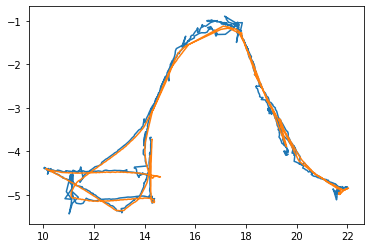

Mean: 0.111, Median: 0.075, Std: 0.112


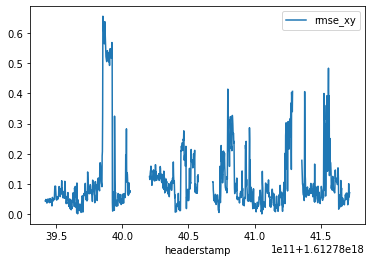

In [17]:
icp = pd.read_csv('~/asl/rss_2021_data/crossdomain_nyutorumlangfinetunetoclafinetune_rumlang1_icp_1.csv')
leica = pd.read_csv('~/asl/rss_2021_data/crossdomain_nyutorumlangfinetunetoclafinetune_rumlang1_leica_1.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y'] + 17.3084
leica['aligned_y'] = leica['trans_x'] - 6.20957
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
# fill gaps with nan
deltas = leica['headerstamp'].diff()
for gap_idx in deltas[deltas > 1e9].index:
    icp['rmse_xy'][np.logical_and(icp['headerstamp'] > leica['headerstamp'][gap_idx -1 ], icp['headerstamp'] < leica['headerstamp'][gap_idx])] = np.nan
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}, Std: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median(), icp['rmse_xy'].std()))

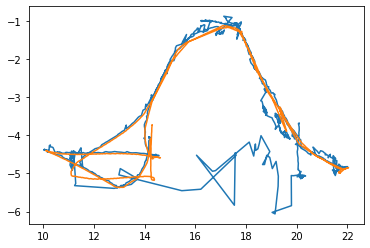

Mean: 0.549, Median: 0.084, Std: 1.500


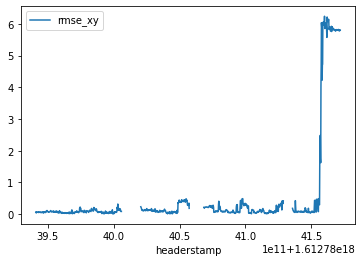

In [36]:
# making sure this is 6DOF
icp = pd.read_csv('~/asl/rss_2021_data/crossdomain_nyutorumlangfinetunetoclafinetune_rumlang1_icp_2.csv')
leica = pd.read_csv('~/asl/rss_2021_data/crossdomain_nyutorumlangfinetunetoclafinetune_rumlang1_leica_2.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y'] + 17.3084
leica['aligned_y'] = leica['trans_x'] - 6.20957
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
# fill gaps with nan
deltas = leica['headerstamp'].diff()
for gap_idx in deltas[deltas > 1e9].index:
    icp['rmse_xy'][np.logical_and(icp['headerstamp'] > leica['headerstamp'][gap_idx -1 ], icp['headerstamp'] < leica['headerstamp'][gap_idx])] = np.nan
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}, Std: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median(), icp['rmse_xy'].std()))

### Garage 3

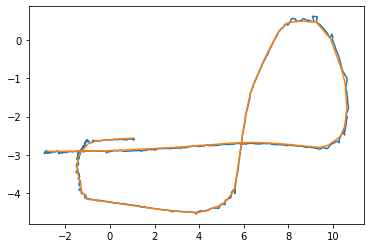

Mean: 0.040, Median: 0.031, Std: 0.029


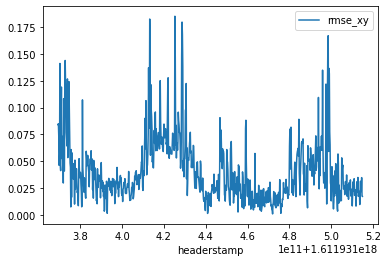

In [18]:
icp = pd.read_csv('~/asl/rss_2021_data/crossdomain_nyutorumlangfinetunetoclafinetune_garage3_icp_3.csv')
leica = pd.read_csv('~/asl/rss_2021_data/crossdomain_nyutorumlangfinetunetoclafinetune_garage3_leica_3.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y']
leica['aligned_y'] = leica['trans_x']
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 4.5e8, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 4.5e8, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}, Std: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median(), icp['rmse_xy'].std()))

# NYU to Office to CLA
## Replay
### Office7

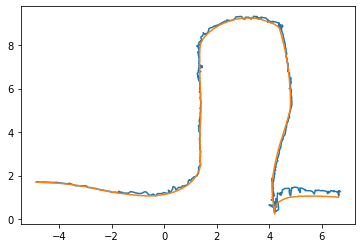

Mean: 0.153, Median: 0.131, Std: 0.095


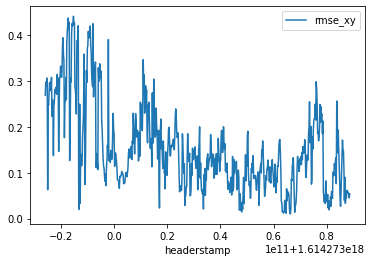

In [38]:
# without 4DOF
icp = pd.read_csv('~/asl/rss_2021_data/crossdomain_nyutoofficereplaytoclareplay_office7_icp_1.csv')
leica = pd.read_csv('~/asl/rss_2021_data/crossdomain_nyutoofficereplaytoclareplay_office7_leica_1.csv')
# alignment of reference frames
rot = 0.09 * np.pi
leica['aligned_x'] = -leica['trans_x']
leica['aligned_y'] = -leica['trans_y']
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 4e8, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 4e8, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}, Std: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median(), icp['rmse_xy'].std()))

### Garage3

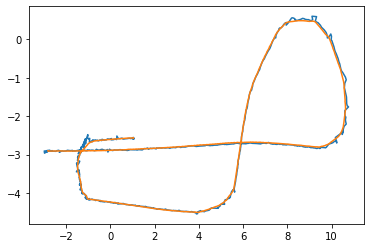

Mean: 0.044, Median: 0.034, Std: 0.036


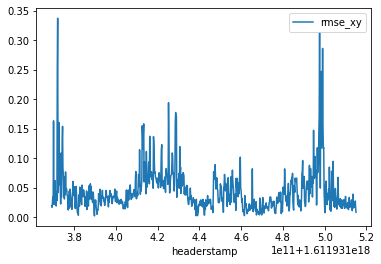

In [37]:
# this is 6DOF
icp = pd.read_csv('~/asl/rss_2021_data/crossdomain_nyutoofficereplaytoclareplay_garage3_icp_1.csv')
leica = pd.read_csv('~/asl/rss_2021_data/crossdomain_nyutoofficereplaytoclareplay_garage3_leica_1.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y']
leica['aligned_y'] = leica['trans_x']
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 4.5e8, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 4.5e8, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}, Std: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median(), icp['rmse_xy'].std()))

## Finetuning
### Office7

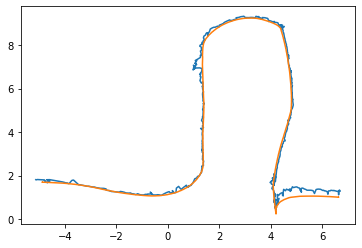

Mean: 0.182, Median: 0.151, Std: 0.114


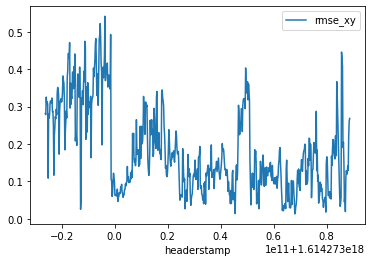

In [39]:
# without 4DOF
icp = pd.read_csv('~/asl/rss_2021_data/crossdomain_nyutoofficefinetunetoclafinetune_office7_icp_1.csv')
leica = pd.read_csv('~/asl/rss_2021_data/crossdomain_nyutoofficefinetunetoclafinetune_office7_leica_1.csv')
# alignment of reference frames
rot = 0.09 * np.pi
leica['aligned_x'] = -leica['trans_x']
leica['aligned_y'] = -leica['trans_y']
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 4e8, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 4e8, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}, Std: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median(), icp['rmse_xy'].std()))

### Garage3

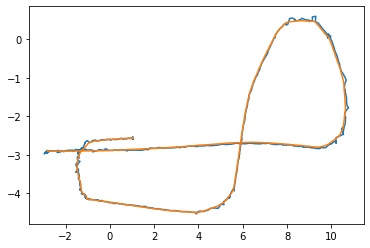

Mean: 0.038, Median: 0.032, Std: 0.027


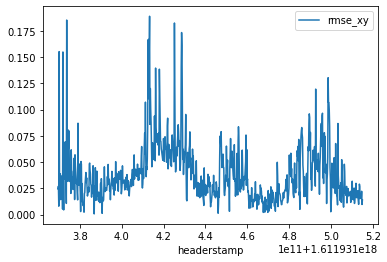

In [40]:
# this is 6DOF
icp = pd.read_csv('~/asl/rss_2021_data/crossdomain_nyutoofficefinetunetoclafinetune_garage3_icp_1.csv')
leica = pd.read_csv('~/asl/rss_2021_data/crossdomain_nyutoofficefinetunetoclafinetune_garage3_leica_1.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y']
leica['aligned_y'] = leica['trans_x']
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 4.5e8, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 4.5e8, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}, Std: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median(), icp['rmse_xy'].std()))